##### CSCI 303
# Introduction to Data Science
<p/>
### 18 - Unsupervised Learning

![PCA scatter plots](pca.png) 

## This Lecture
---
- Introduction to unsupervised learning
- Data preprocessing
  - Scaling and normalization
  - Dimensionality reduction

## Setup
---
The obligatory setup code.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from pandas import DataFrame

plt.style.use("ggplot")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# function for generating normally distributed data|
def sample_cluster(n, x, y, sigma):
    x = np.random.randn(n) * sigma + x;
    y = np.random.randn(n) * sigma + y;
    return np.array([x, y]).T


## Unsupervised vs Supervised
---
In supervised learning, we have *labeled* data:
- some input variables 
- some additional variable(s) which we are learning to predict

For example, we might have a classification problem like the one below (colors = class labels):

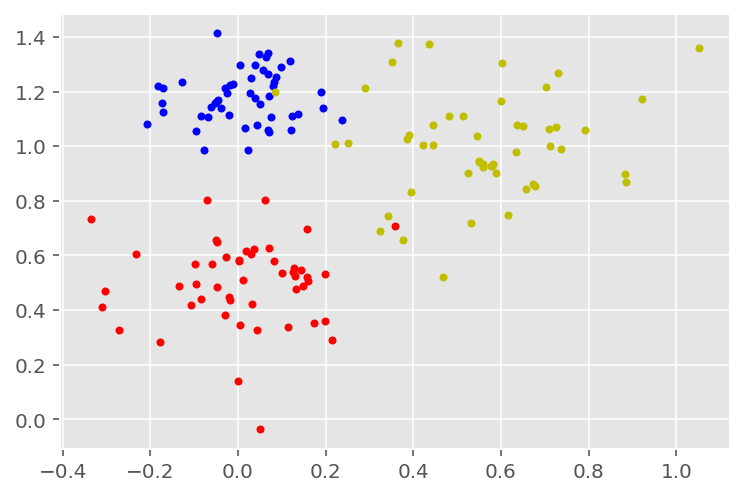

In [4]:
np.random.seed(1234)

# creates three 'sets' of randomly distributed data
c1 = sample_cluster(50, 0, 0.5, 0.15)
c2 = sample_cluster(50, 0, 1.2, 0.1)
c3 = sample_cluster(50, 0.5, 1, 0.2)

# plots those three sets (c1 is red. c2 is blue. c3 is yellow)
plt.plot(c1[:,0], c1[:,1], 'r.', c2[:,0], c2[:,1], 'b.', c3[:,0], c3[:,1], 'y.',)
plt.show()

In *unsupervised* learning, we are given no labels, and we seek to find hidden patterns in the data: 

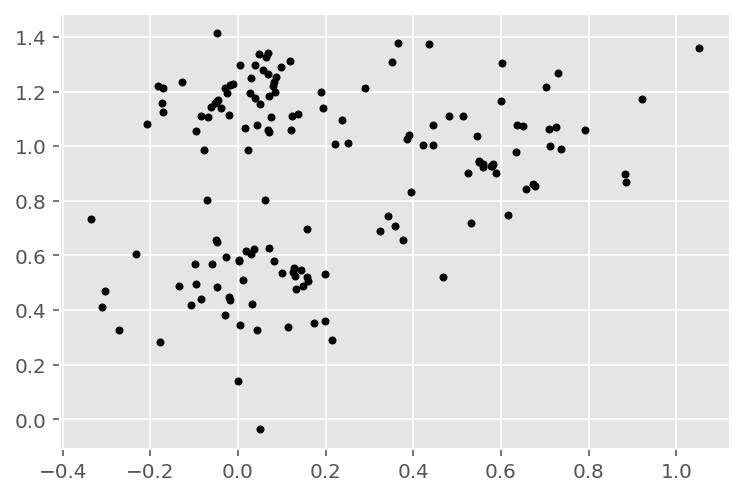

In [6]:
# since there are no labels we want the data to look the same (make them all black)
plt.plot(c1[:,0], c1[:,1], 'k.', c2[:,0], c2[:,1], 'k.', c3[:,0], c3[:,1], 'k.',)
plt.show()

### Questions we could ask about the data:

- Is there a transformation of the data which will reveal patterns (to humans or algorithms)?
- What are the relevant features of the data which are informative?
- Are there natural groupings into which we could separate the data?

## Challenges of Unsupervised Learning
---
Since we have no labeled data, there are no predictions that we can make *and meaningfully test*.

Evaluation of unsupervised learning algorithms is often largely subjective.

Unsupervised learning is often used in *exploratory data analysis*.

## Example Applications
---
- Group (cluster) gene expression data in cancer patients to look for patterns; a gene (or group of genes) which strongly differentiates patients may be worth further study:
  - Different disease causes
  - Different responses to treatment
- Anomaly Detection: E.g., look for anomalous patterns in credit card spending
- Group people or organizations according to some new identifiers
  - Reveal hidden similarities
  - Provide alerts to activities with similar risks (e.g., fund analysis)
  - Targeted marketing

## Data Preprocessing
---
- Generally useful to improve supervised learning algorithm performance
- Scaling/normalization:
  - Transform data so that features are on same scale or have same statistics
  - Helps some algorithms which are sensitive to scale
- Dimensionality reduction:
  - Transform data into a **sub-space in which visualization and/or machine learning is easier**
  - Reduce computational cost of learning

## Scaling
---
Is a thing.  It helps with some machine learning algorithms.  
Two common ones with numpy examples for a vector of values for a single feature, ```x```:

**Standard scaling**:
```x_scaled = (x - np.mean(x)) / np.std(x)```

**Min-max scaling** (to [0, 1] range): ```x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x))```


## Dimensionality Reduction
---
**Problem**:
- Input data is often has (very) high dimensionality (100s to 1000s)
- This can lead to expensive learning and promotes overfitting
- Variables can often also have high correlation (redundant information, but more noise, again promoting overfitting)

**Solution**:
- Extract most relevant sub-space of input data before visualizing or using machine learning

### Dimensionality reduction can be used as preprocessing for either supervised or unsupervised learning

## Principal Components Analysis
---
**The most popular form of dimensionality reduction.**

Lots of linear algebra behind this.  We won't go there.

Basically, rotates and transforms the data into a **new, high-dimensional space**.  
Coordinate system of the new space is such that:
- Dimensions (axes, features) are ordered by the amount of **"fraction of variance explained"** (relevance)
- Feature values along 1st dimension give highest variance explained
- Feature values along 2nd dimension give 2nd highest variance explained
- Etc.

**A subspace (fewer dimensions) of the original data space can be created  
by discarding dimensions that have low variance explained.**

A dimension with a high variance explained may indicate that two or more  
distinct groups fall on different locations along that dimension.  
E.g....

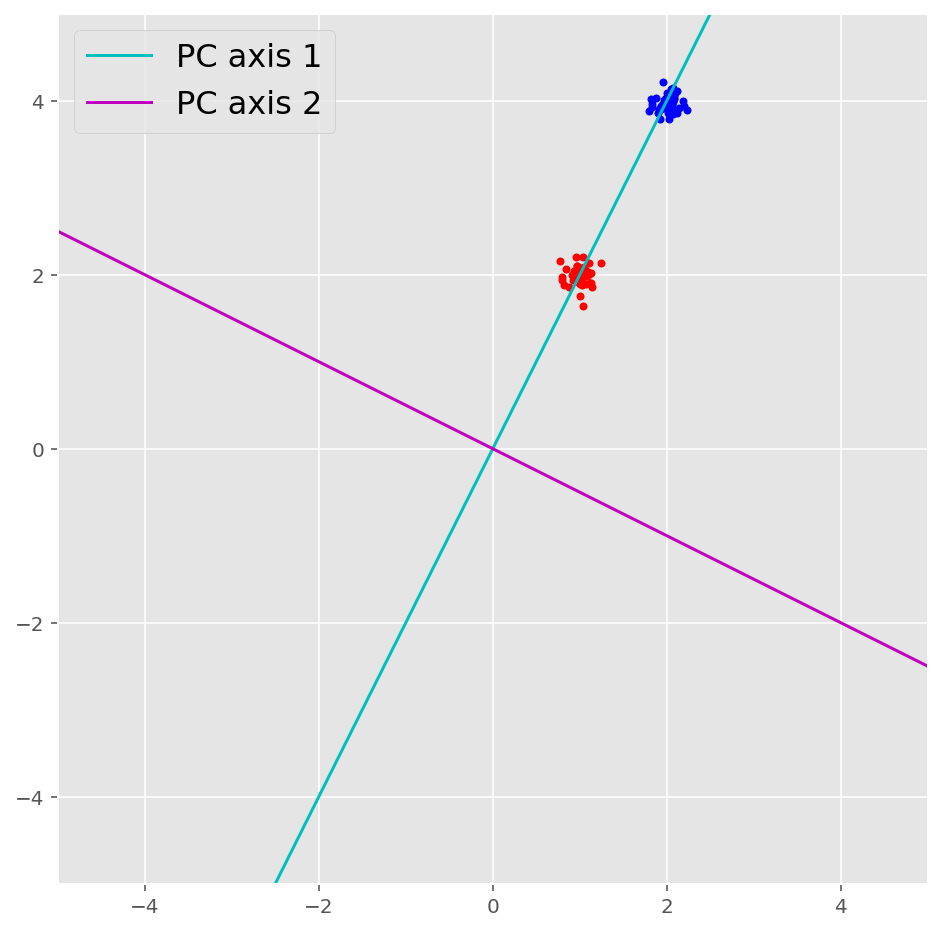

In [7]:
# Code is only for creating figure below. Not instructive of how to execute PCA.
np.random.seed(1234)
c1 = sample_cluster(50, 1, 2, 0.1)
c2 = sample_cluster(50, 2, 4, 0.1)
plt.figure(figsize=(8, 8))
plt.plot(c1[:,0], c1[:,1], 'r.', c2[:,0], c2[:,1], 'b.')
ax = plt.gca()
ax.axes.set_aspect('equal')
plt.axis([-5, 5, -5, 5])
ax1 = plt.plot([-2.5, 2.5], [-5, 5], 'c-', label='PC axis 1')
ax2 = plt.plot([-5, 5], [2.5, -2.5], 'm-', label='PC axis 2')
plt.legend(fontsize=16)
plt.show()

**More commonly**, the data are simply "spread" more widely along a dimension of high  
variance explained than along a dimension of low variance explained.  
E.g....

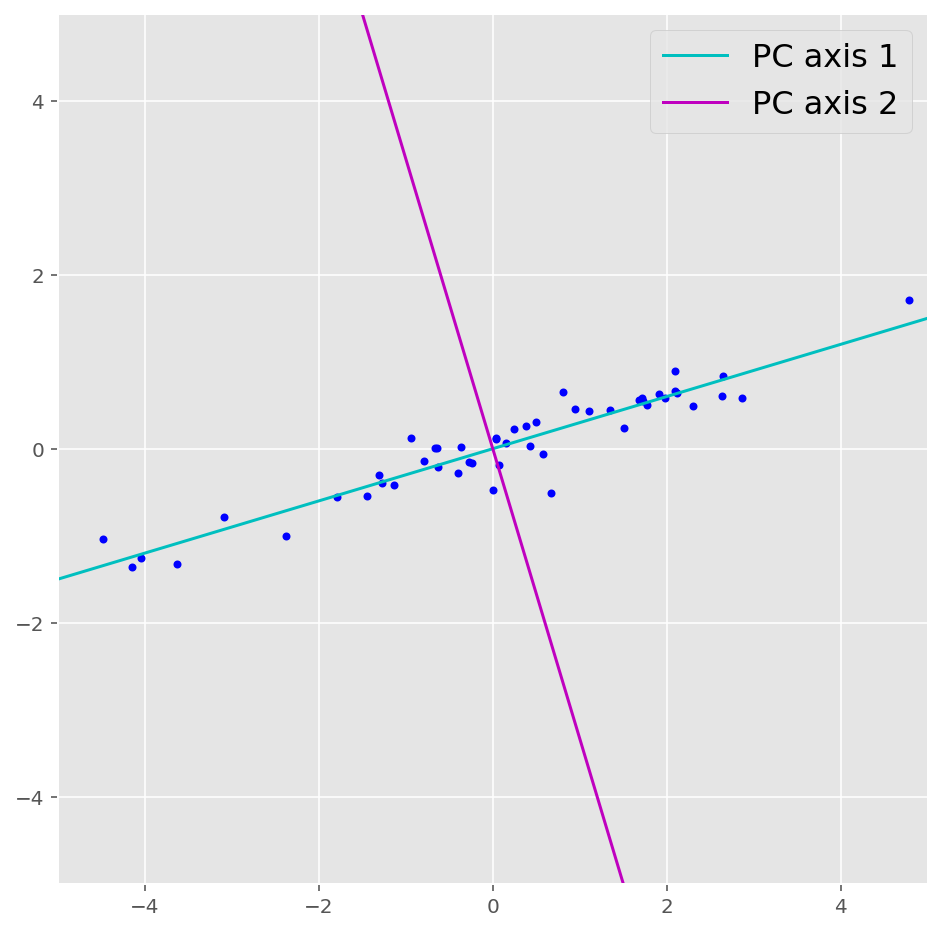

In [8]:
# Code is only for creating figure below. Not instructive of how to execute PCA.
np.random.seed(1234)
x = np.random.randn(50)*2
y = 0.3 * x + np.random.randn(50)/5
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'b.')
plt.plot()
ax = plt.gca()
ax.axes.set_aspect('equal')
plt.axis([-5, 5, -5, 5])
s = 1.5
ax1 = plt.plot([-5, 5], [-s, s], 'c-', label='PC axis 1')
ax2 = plt.plot([-s, s], [5, -5], 'm-', label='PC axis 2')
plt.legend(fontsize=16)
plt.show()

## PCA dimensinality reduction example
---
Consider this dataset:

In [9]:
M = [[1, -1, 7],[20, 3, -5],[1,1,1]]

x1 = np.random.randn(300);
y1 = np.random.randn(300);
z1 = np.random.randn(300);
data1 = np.array([x1, y1, z1]).T @ M

x2 = np.random.randn(300);
y2 = np.random.randn(300);
z2 = np.random.randn(300);
data2 = np.array([x2, y2, z2]).T @ M + np.array([20,-10,15])

data = np.concatenate((data1, data2))

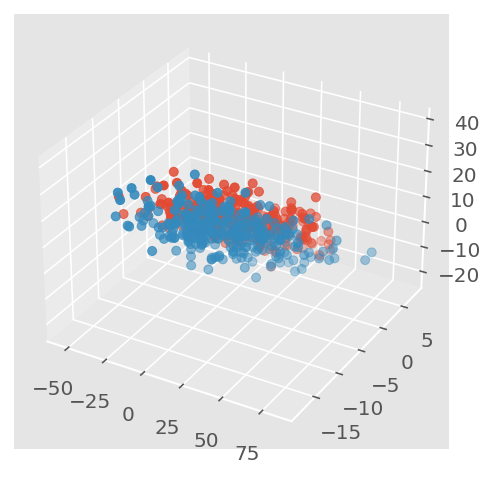

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2])
ax.scatter(data2[:,0], data2[:,1], data2[:,2])
plt.show()

Let's apply PCA and look at the first two principal components.


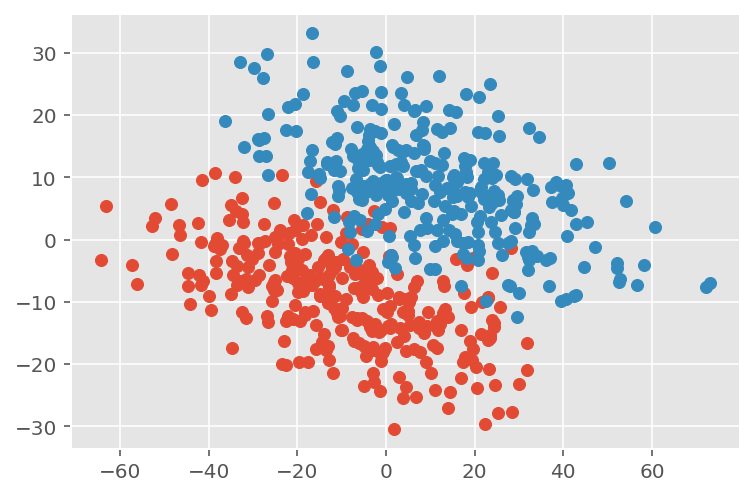

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
data1_pca = pca.transform(data1)
data2_pca = pca.transform(data2)

plt.scatter(data1_pca[:,0], data1_pca[:,1])
plt.scatter(data2_pca[:,0], data2_pca[:,1])
plt.show()

We've reducted the dimensionality from 3 to 2, while maintaining the separabililty if the two data clases (for the most part).

## Taiwan Credit Card Default Dataset
---
- Real data aren't nearly as pretty

In [10]:
data = pd.read_csv('default.csv', header=1, encoding='utf8', index_col='ID')
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# Use get_dummies to convert categorical features into sets of Boolean features (mapped to values of 0 and 1)
all_dummies = ['SEX', 'EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df3 = pd.get_dummies(data, columns=all_dummies)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 92 columns):
LIMIT_BAL                     30000 non-null int64
AGE                           30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
SEX_1                         30000 non-null uint8
SEX_2                         30000 non-null uint8
EDUCATION_0             

Pretend this is a supervised learning problem in which we want  
a model that predicts whether there will be a payment default  
in the next month.

In [12]:
# Extract separate DataFrames (or Series) for the predictors and the targets
target = 'default payment next month'
inputs3 = df3.columns.drop(target)

X = df3[inputs3]
t = df3[target]

X.shape

(30000, 91)

We have a lot of predictors: 91 (though this isn't super high for a data set with lots of samples--30,000 in this case).  

This could make a trained model prone to overfitting. Let's use PCA to lower the number of dimensions,  
and see if we learn anything by visualing the two PC dimensions with the highest variance explained.

In [13]:
# First we'll apply standard scaling to the predictors.

from sklearn.preprocessing import StandardScaler

 # Calculate the scaling paratmeters
ss = StandardScaler()
ss.fit(X)

# Perform the scaling
X_scaled = ss.transform(X)

#print(X)
#print(X_scaled)

In [14]:
# Now we'll apply PCA, and keep the top 10 components/dimensions

# Use PCA to compute the transformation parameters
pca = PCA(n_components=10) 
pca.fit(X_scaled)

# Apply the transformation to our original data
X_pca = pca.transform(X_scaled)

In [15]:
X.shape, X_pca.shape

((30000, 91), (30000, 10))

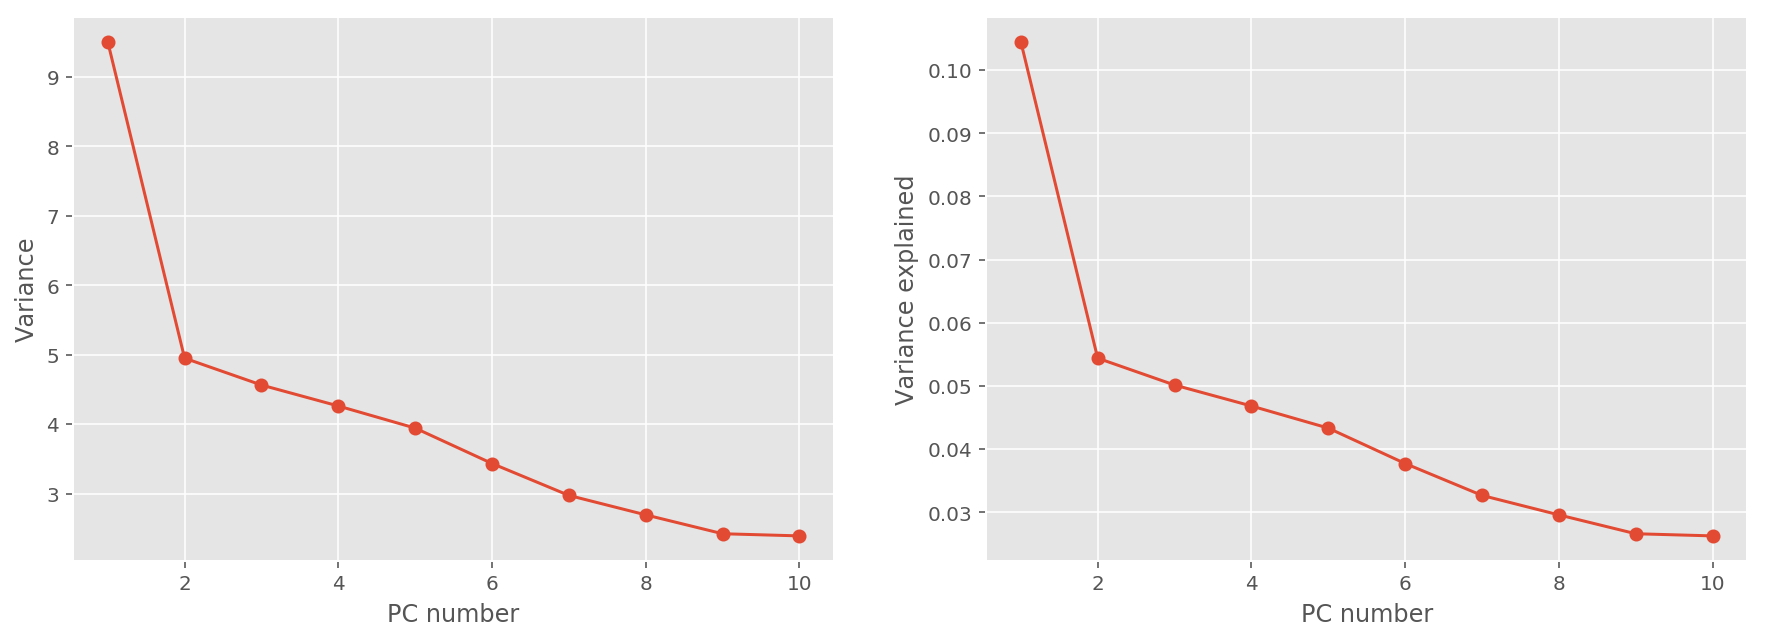

In [16]:
# Let's look at the variance (and variance explained) for each component

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,11), pca.explained_variance_, 'o-')
plt.xlabel('PC number')
plt.ylabel('Variance')

plt.subplot(1,2,2)
plt.plot(np.arange(1,11), pca.explained_variance_ratio_, 'o-')
plt.xlabel('PC number')
_ = plt.ylabel('Variance explained')

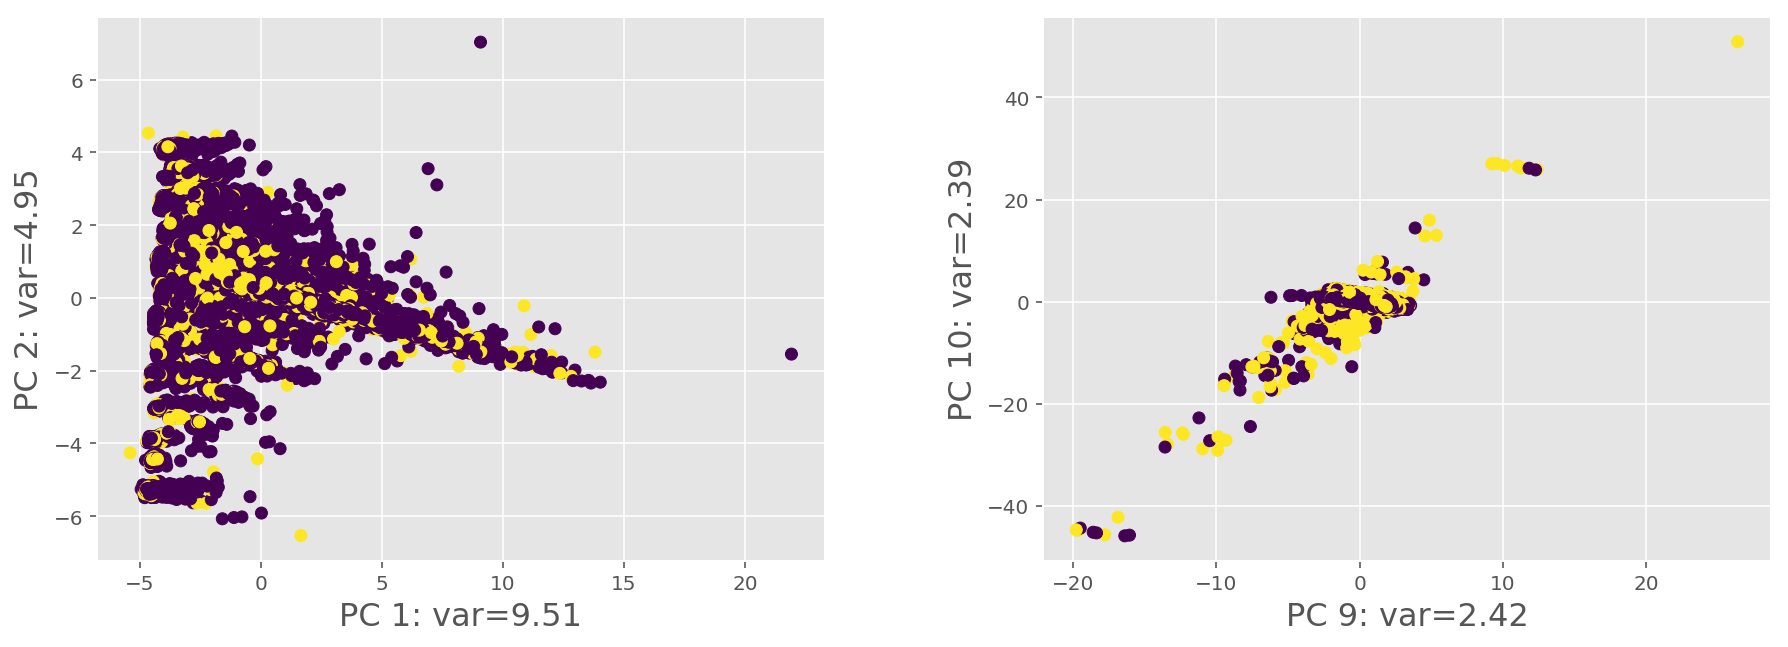

In [17]:
# Let's look at some of the transformed data, directly.

plt.figure(figsize=(15, 5))

# Plot the top two (largest variance) PCs against each other
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=t)
plt.xlabel('PC 1: var=%0.2f' % (np.var(X_pca[:,0])), fontsize=16)
plt.ylabel('PC 2: var=%0.2f' % (np.var(X_pca[:,1])), fontsize=16)

# Plot the bottom two (smallest variance) PCs against each other
plt.subplot(1,2,2)
plt.scatter(X_pca[:,8], X_pca[:,9], c=t)
plt.xlabel('PC 9: var=%0.2f' % (np.var(X_pca[:,8])), fontsize=16)
plt.ylabel('PC 10: var=%0.2f' % (np.var(X_pca[:,9])), fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()

Ok. There's not a lot to see there. A couple observations:

- The variance of PC1 is notably higher compared to PC2, but variance appears to diminish gradually after that.
- This joint distribution does not look jointly Gaussian (a multivariate Gaussian distribution), at least for the top two PCs.

Let's look at another preprocessing technique...

### An alternative (or additional) preprocessing step to **scaling** is **normalization**.

**Scaling**: For all the samples values *of a given feature*, compute scaling parameters and apply them to all those sample values.

**Normalization**: For an individual sample, scale all the feature values. Different samples are scaled by different amount. E.g., scale such that the sample has unit norm (lies on the unit circle / sphere / hypersphere).

In [18]:
# Let's use unit normalization as a preprocessing step.

from sklearn.preprocessing import Normalizer

# Calculate the normalization paratmeters
normalized = Normalizer()
normalized.fit(X)

# Apply the normalization to our original data
X_norm = normalized.transform(X)

# print(X_norm)
X_norm.shape

(30000, 91)

In [19]:
# Now we'll try PCA again

# Use PCA to compute the transformation parameters for the normalized data
pca = PCA(n_components=10)
pca.fit(X_norm)

# Apply the transformation to our normalized data
X_pca = pca.transform(X_norm)

In [20]:
X.shape, X_pca.shape

((30000, 91), (30000, 10))

[0.18087185 0.01926118 0.00697569 0.00531691 0.00441784 0.00388976
 0.00349163 0.00284964 0.0026358  0.00161054]
[0.7717392  0.08218308 0.02976367 0.02268605 0.01884993 0.01659673
 0.01489799 0.01215878 0.01124636 0.00687181]


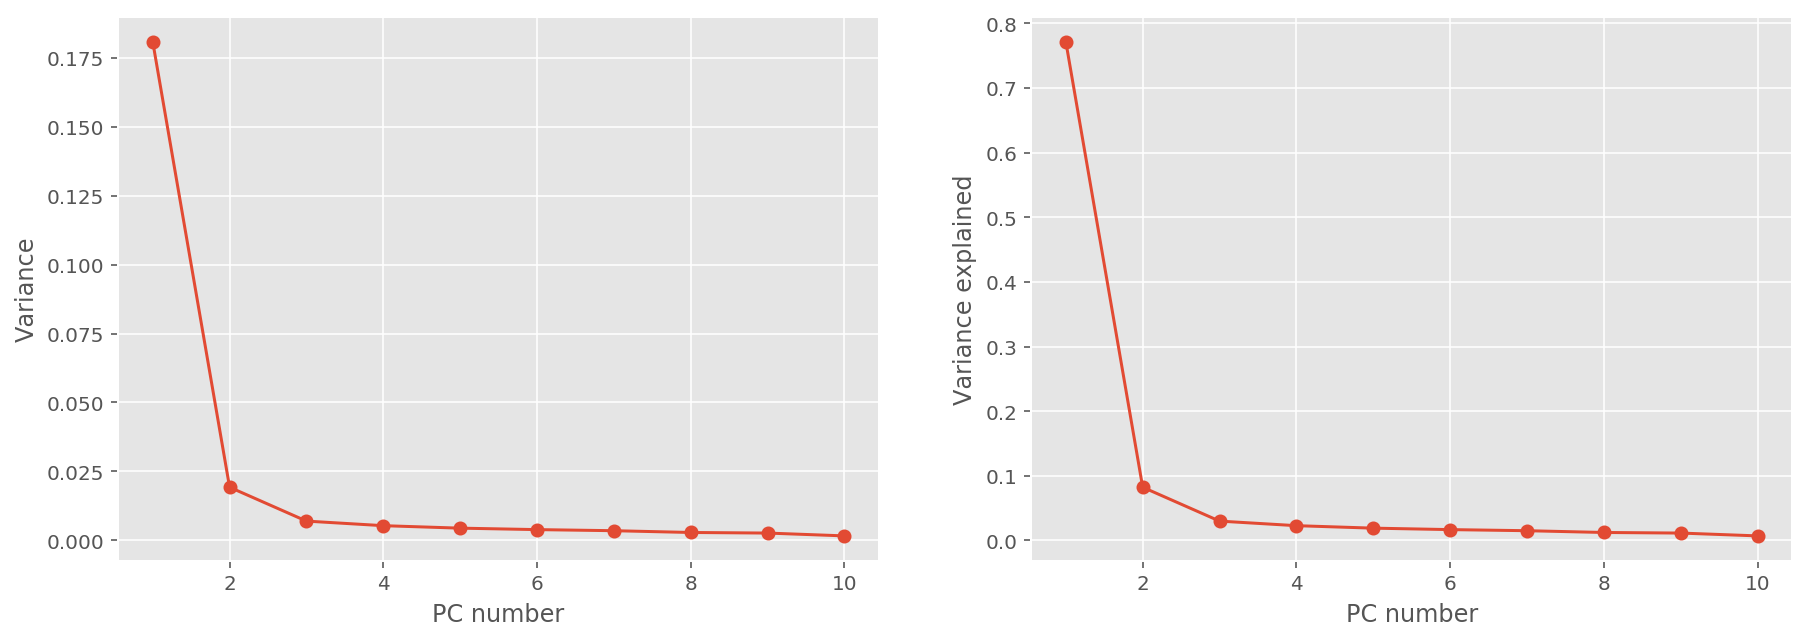

In [21]:
# Let's look at the variance (and variance explained) for each component

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,11), pca.explained_variance_, 'o-')
plt.xlabel('PC number')
plt.ylabel('Variance')

plt.subplot(1,2,2)
plt.plot(np.arange(1,11), pca.explained_variance_ratio_, 'o-')
plt.xlabel('PC number')
_ = plt.ylabel('Variance explained')

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

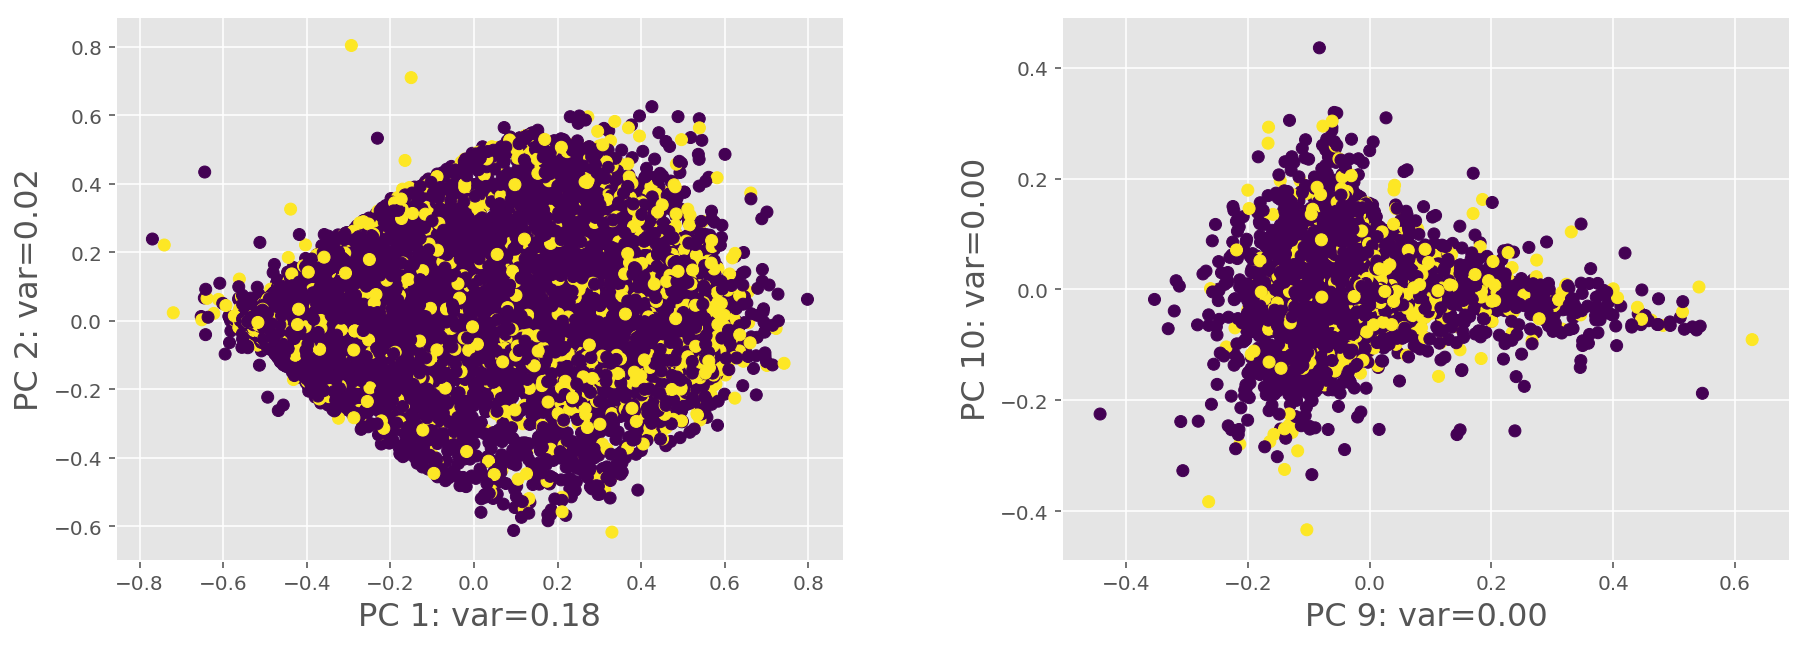

In [22]:
# Let's look at some of the transformed data, directly.

plt.figure(figsize=(15, 5))

# Plot the top two (largest variance) PCs against each other
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=t)
plt.xlabel('PC 1: var=%0.2f' % (np.var(X_pca[:,0])), fontsize=16)
plt.ylabel('PC 2: var=%0.2f' % (np.var(X_pca[:,1])), fontsize=16)

# Plot the bottom two (smallest variance) PCs against each other
plt.subplot(1,2,2)
plt.scatter(X_pca[:,8], X_pca[:,9], c=t)
plt.xlabel('PC 9: var=%0.2f' % (np.var(X_pca[:,8])), fontsize=16)
plt.ylabel('PC 10: var=%0.2f' % (np.var(X_pca[:,9])), fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()

With normalization, the data variance of the data is well explained by just two components. A model built with only those two components may performance just as well (or better!) than one built with all of the original 91 features.

## Take home points

- PCA can (sometimes):
  - Allow us to reduce the number of feature dimensions in our model, reducing the risk of overfitting
  - Allow us to make meaningful data visualization from the top 1 to 3 components
- Scaling and normalization can (sometimes):
  - Allow for a smaller number of PCA dimensions to explain a larger amount of the overall data variation (and thus allow us to use even fewer dimensions in our model.
  - E.g., with normalization, most of the Taiwan data is explained by just the top 2 PCs. Without normalization we may have needed upwards of 8 PCs.


## Next Time
---
- Clustering